In [1]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
import random

def create_datasets(k, a, b, sigma):
    """
    datasets X, Y1, and Y2.
    
    k (int): Number of data points.
    a (float): Coefficient for the linear relationship.
    b (float): Intercept for the linear relationship.
    sigma (float): Standard deviation for noise in Y2.
    
    X (np.ndarray): Independent variable dataset.
    Y1 (np.ndarray): Dependent variable dataset (correlated with X).
    Y2 (np.ndarray): Dependent variable dataset (not correlated with X).
    """
    # Generates k evenly spaced values for X
    X = np.linspace(1, k, k)
    
    # Create Y1 which is linearly correlated with X
    Y1 = a * X + b
    
    # Create Y2 which adds random noise to Y1 making it not correlated with X
    Y2 = a * X + b + np.random.normal(1, sigma, k)
    
    return X, Y1, Y2

    # Plot datasets X vs Y1 and X vs Y2.
def plot_datasets(X, Y1, Y2):
    
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.scatter(X, Y1)
    plt.title('X vs Y1')
    
    plt.subplot(1, 2, 2)
    plt.scatter(X, Y2)
    plt.title('X vs Y2')
    
    plt.show()

    # Calculates Pearson and Spearman Correlation coefficient
def calculate_correlation(X, Y):
    
    pearson_corr, _ = pearsonr(X, Y)
    
    spearman_corr, _ = spearmanr(X, Y)
    
    return pearson_corr, spearman_corr

def is_correlation_significant(X, Y, n=10000):

    # Calculate original correlation coefficients
    pearson_corr, spearman_corr = calculate_correlation(X, Y)
    
    # Bootstrap sampling
    temp_corrs = []
    for _ in range(n):
        # Randomly sample Y without replacement
        Y_temp = random.sample(list(Y), len(Y))
        temp_corr, _ = pearsonr(X, Y_temp)
        temp_corrs.append(temp_corr)
    
    # Calculate 95% confidence interval
    lower, upper = np.percentile(temp_corrs, [2.5, 97.5])
    
    # Checks if original correlation coefficients are within the confidence interval
    return lower <= pearson_corr <= upper, lower <= spearman_corr <= upper

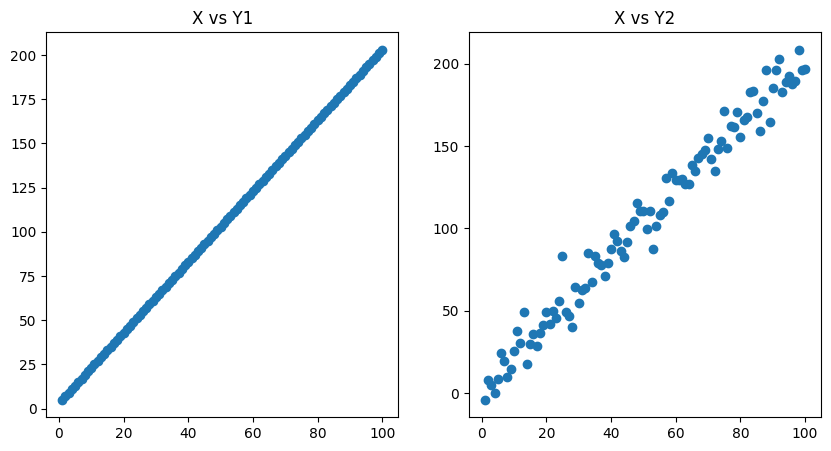

Pearson correlation for Y1: 1.0, Spearman correlation for Y1: 0.9999999999999999
Pearson correlation for Y2: 0.9884812203163079, Spearman correlation for Y2: 0.9877587758775878
Is Pearson correlation for Y1 significant? False
Is Spearman correlation for Y1 significant? False
Is Pearson correlation for Y2 significant? False
Is Spearman correlation for Y2 significant? False


In [2]:
# Create datasets
k = 100
a = 2
b = 3
sigma = 10
X, Y1, Y2 = create_datasets(k, a, b, sigma)

# Plot datasets
plot_datasets(X, Y1, Y2)

# Correlation coefficients
pearson_corr_Y1, spearman_corr_Y1 = calculate_correlation(X, Y1)
pearson_corr_Y2, spearman_corr_Y2 = calculate_correlation(X, Y2)
print(f'Pearson correlation for Y1: {pearson_corr_Y1}, Spearman correlation for Y1: {spearman_corr_Y1}')
print(f'Pearson correlation for Y2: {pearson_corr_Y2}, Spearman correlation for Y2: {spearman_corr_Y2}')

# Determine and print if correlations are significant
is_pearson_Y1_significant, is_spearman_Y1_significant = is_correlation_significant(X, Y1)
is_pearson_Y2_significant, is_spearman_Y2_significant = is_correlation_significant(X, Y2)
print(f'Is Pearson correlation for Y1 significant? {is_pearson_Y1_significant}')
print(f'Is Spearman correlation for Y1 significant? {is_spearman_Y1_significant}')
print(f'Is Pearson correlation for Y2 significant? {is_pearson_Y2_significant}')
print(f'Is Spearman correlation for Y2 significant? {is_spearman_Y2_significant}')


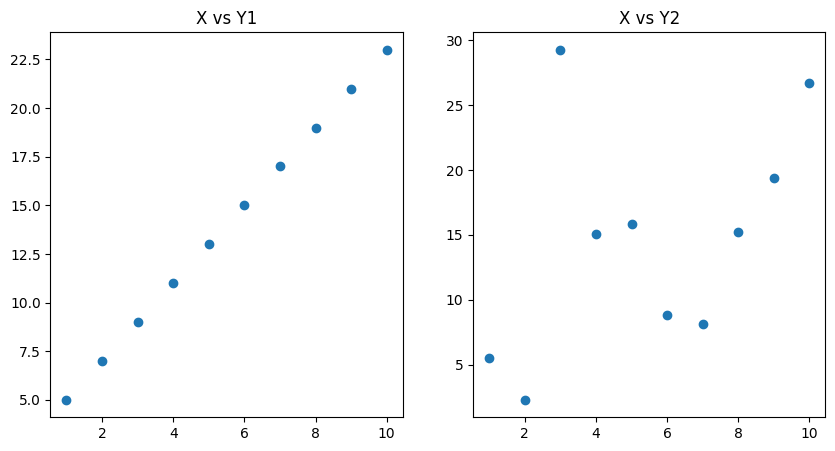

Pearson correlation for Y1: 1.0, Spearman correlation for Y1: 0.9999999999999999
Pearson correlation for Y2: 0.44337279438714894, Spearman correlation for Y2: 0.5030303030303029
Is Pearson correlation for Y1 significant? False
Is Spearman correlation for Y1 significant? False
Is Pearson correlation for Y2 significant? True
Is Spearman correlation for Y2 significant? True


In [3]:
# Create datasets
k = 10
a = 2
b = 3
sigma = 10
X, Y1, Y2 = create_datasets(k, a, b, sigma)

# Plot datasets
plot_datasets(X, Y1, Y2)

# Correlation coefficients
pearson_corr_Y1, spearman_corr_Y1 = calculate_correlation(X, Y1)
pearson_corr_Y2, spearman_corr_Y2 = calculate_correlation(X, Y2)
print(f'Pearson correlation for Y1: {pearson_corr_Y1}, Spearman correlation for Y1: {spearman_corr_Y1}')
print(f'Pearson correlation for Y2: {pearson_corr_Y2}, Spearman correlation for Y2: {spearman_corr_Y2}')

# Determine and print if correlations are significant
is_pearson_Y1_significant, is_spearman_Y1_significant = is_correlation_significant(X, Y1)
is_pearson_Y2_significant, is_spearman_Y2_significant = is_correlation_significant(X, Y2)
print(f'Is Pearson correlation for Y1 significant? {is_pearson_Y1_significant}')
print(f'Is Spearman correlation for Y1 significant? {is_spearman_Y1_significant}')
print(f'Is Pearson correlation for Y2 significant? {is_pearson_Y2_significant}')
print(f'Is Spearman correlation for Y2 significant? {is_spearman_Y2_significant}')
